### Imports

In [84]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transf
from matplotlib import pyplot as plt

### Criando a rede neural

In [85]:
class NeuralNet(nn.Module): #NN Herda nn_Module
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten() #Achatando imagem
        
        # Neurônio 1: 28*28 pixels de entrada, 128 saídas
        self.fc1 = nn.Linear(28*28, 128)
        
        # Neurônio 2: 128 px de entrada, classif. em 10 tipos (0-9)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Baixando o dataset

In [86]:
transform = transf.Compose([transf.ToTensor(), transf.Normalize((0.5), (0.5)) ])

# Criando dataset de treino e de teste
train_dataset = torchvision.datasets.MNIST(
    root="./data", transform = transform, train=True, download=True
)

test_dataset = rain_dataset = torchvision.datasets.MNIST(
    root="./data", transform = transform, train=False, download=True
)

# Criando o batch (que adicionará batch_size imagens ao dataset quando ele acabar)
train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset, batch_size = 32, shuffle=True
)

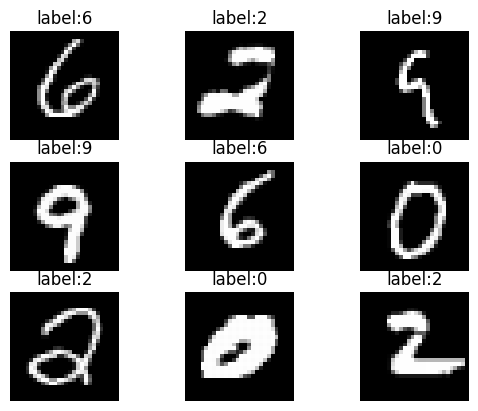

In [87]:
examples = iter(train_loader)
images, labels = next(examples)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i][0], cmap="gray")
    plt.title(f"label:{labels[i].item()}")
    plt.axis("off")
plt.show()

In [88]:
model = NeuralNet()

# Função de perda e otimizador
criterium = nn.CrossEntropyLoss() #Entropia cruzada
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Treinamento
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Zerar os gradientes
        optimizer.zero_grad()
        
        # Passar pelo modelo
        outputs = model(images)
        
        # Calcular a perda
        loss = criterium(outputs, labels)
        
        loss.backward()
        
        # Atualizar os pesos
        optimizer.step()
    print((f"Epoch: {epoch+1}/{num_epochs}\nLoss: {loss.item():.4f}\n"))

Epoch: 1/5
Loss: 0.1135

Epoch: 2/5
Loss: 0.1747

Epoch: 3/5
Loss: 0.0578

Epoch: 4/5
Loss: 0.0245

Epoch: 5/5
Loss: 0.0663

